In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats
from IPython.display import display

In [2]:
def fake_data(n, coeff, scale_error):
    x = np.random.randn(n)
    return x, x * coeff + np.random.random(n) * scale_error

In [3]:
n = 100
coeffs = [10, -10, 0.1, -0.1]
errors = [0, 5, 10, 50]

0 100 10 0


slope        1.000000e+01
intercept    2.220446e-16
r_value      1.000000e+00
p_value      0.000000e+00
std_err      3.010489e-08
Name: Run 1, dtype: float64

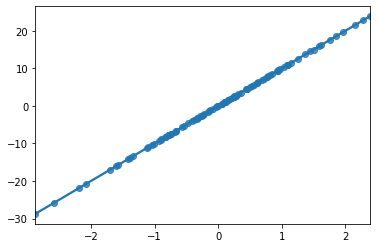

1 100 10 5


slope        9.994608e+00
intercept    2.685397e+00
r_value      9.897570e-01
p_value      1.152619e-84
std_err      1.456254e-01
Name: Run 2, dtype: float64

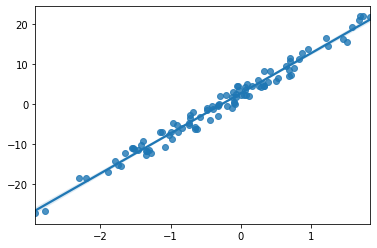

2 100 10 10


slope        1.026489e+01
intercept    5.536146e+00
r_value      9.691132e-01
p_value      2.171264e-61
std_err      2.638693e-01
Name: Run 3, dtype: float64

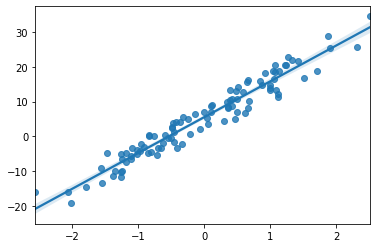

3 100 10 50


slope        1.045878e+01
intercept    2.333274e+01
r_value      6.020700e-01
p_value      3.452706e-11
std_err      1.401088e+00
Name: Run 4, dtype: float64

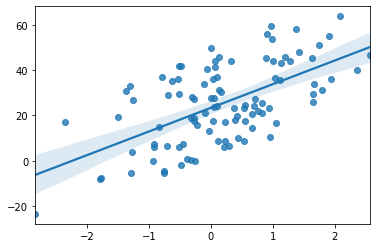

4 100 -10 0


slope       -1.000000e+01
intercept    1.179612e-16
r_value     -1.000000e+00
p_value      0.000000e+00
std_err      0.000000e+00
Name: Run 5, dtype: float64

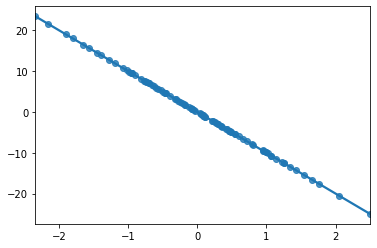

5 100 -10 5


slope       -1.022831e+01
intercept    2.364085e+00
r_value     -9.914292e-01
p_value      1.931657e-88
std_err      1.361512e-01
Name: Run 6, dtype: float64

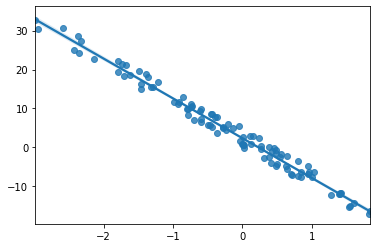

6 100 -10 10


slope       -9.763700e+00
intercept    4.632472e+00
r_value     -9.577407e-01
p_value      7.758797e-55
std_err      2.962050e-01
Name: Run 7, dtype: float64

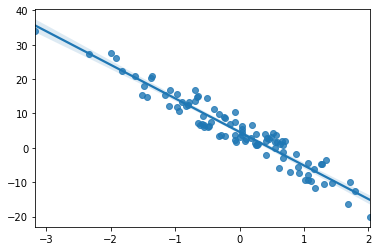

7 100 -10 50


slope       -8.837716e+00
intercept    2.498567e+01
r_value     -5.195883e-01
p_value      3.034900e-08
std_err      1.468038e+00
Name: Run 8, dtype: float64

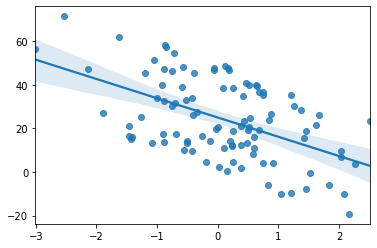

8 100 0.1 0


slope        0.1
intercept    0.0
r_value      1.0
p_value      0.0
std_err      0.0
Name: Run 9, dtype: float64

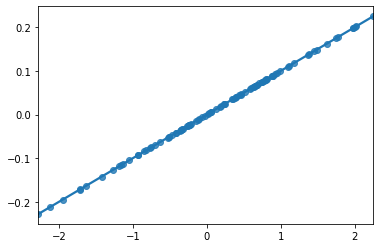

9 100 0.1 5


slope        0.325390
intercept    2.458189
r_value      0.216908
p_value      0.030183
std_err      0.147928
Name: Run 10, dtype: float64

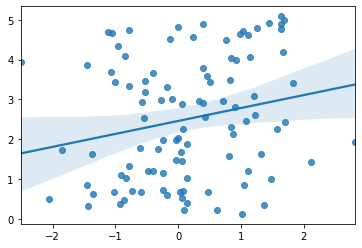

10 100 0.1 10


slope        0.025726
intercept    4.624813
r_value      0.008922
p_value      0.929793
std_err      0.291243
Name: Run 11, dtype: float64

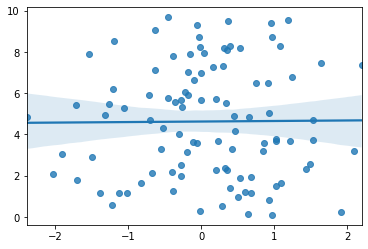

11 100 0.1 50


slope        -0.949032
intercept    22.124752
r_value      -0.059617
p_value       0.555724
std_err       1.605170
Name: Run 12, dtype: float64

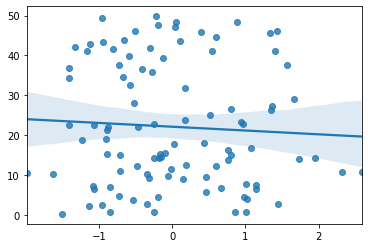

12 100 -0.1 0


slope       -1.000000e-01
intercept   -1.387779e-17
r_value     -1.000000e+00
p_value      0.000000e+00
std_err      0.000000e+00
Name: Run 13, dtype: float64

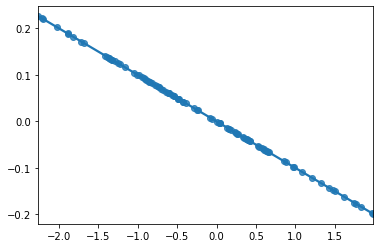

13 100 -0.1 5


slope       -0.149555
intercept    2.734722
r_value     -0.107186
p_value      0.288488
std_err      0.140133
Name: Run 14, dtype: float64

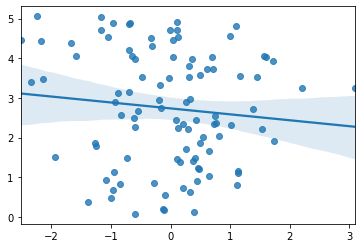

14 100 -0.1 10


slope       -0.128022
intercept    5.010644
r_value     -0.037772
p_value      0.709071
std_err      0.342131
Name: Run 15, dtype: float64

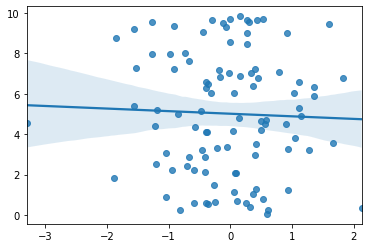

15 100 -0.1 50


slope         0.354892
intercept    23.823231
r_value       0.024064
p_value       0.812151
std_err       1.489305
Name: Run 16, dtype: float64

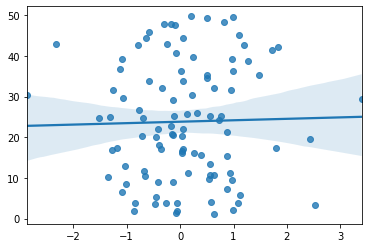

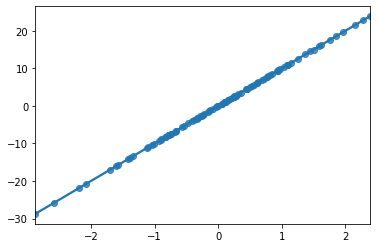

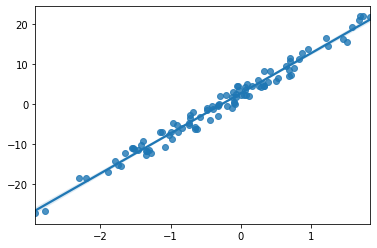

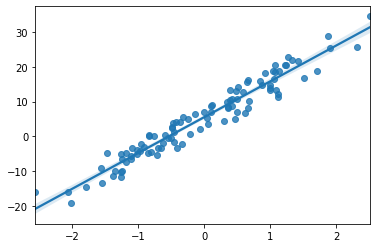

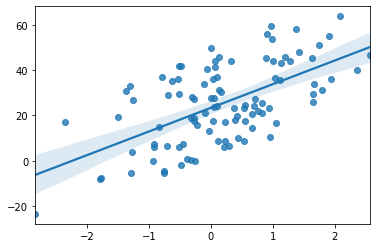

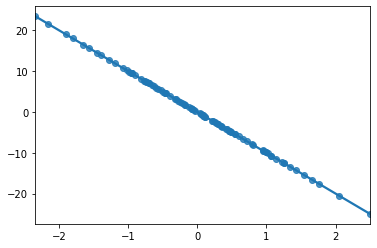

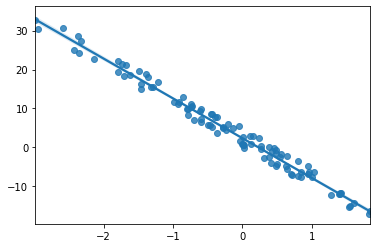

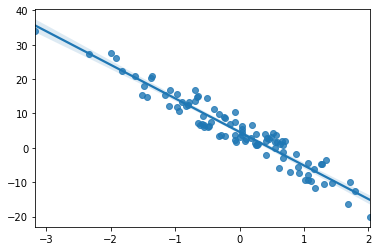

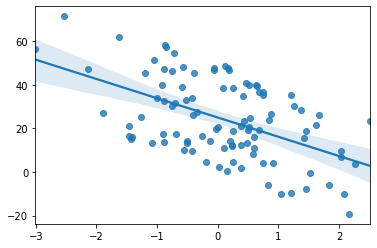

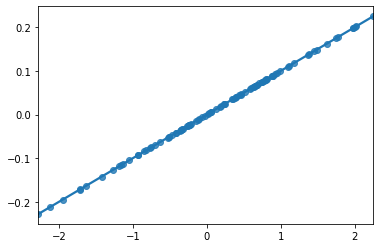

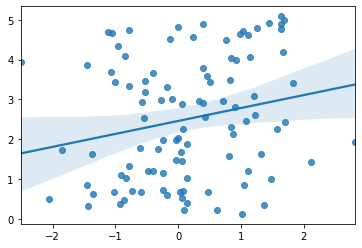

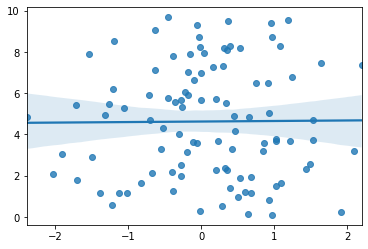

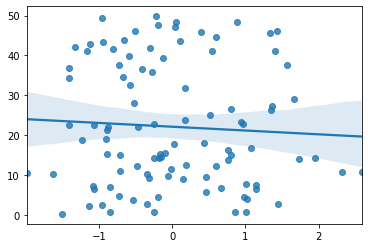

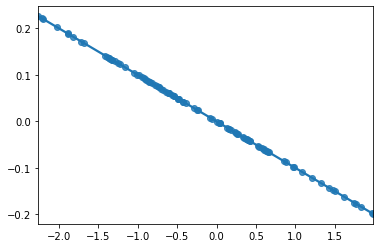

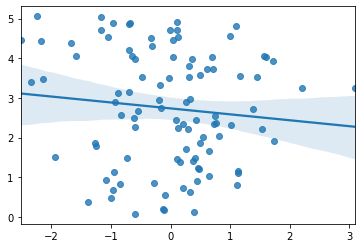

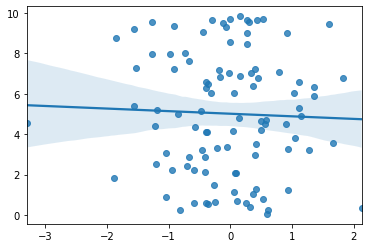

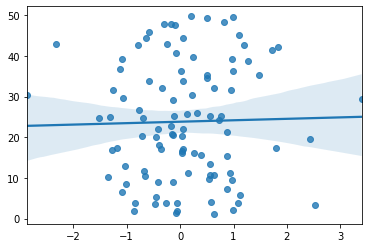

In [4]:
import itertools

dfs = []

for idx, (coeff, error) in enumerate(itertools.product(coeffs, errors)):
    print(idx, n, coeff, error)
    x, y = fake_data(n, coeff, error)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    ser = pd.Series(
        {
            "slope": slope,
            "intercept": intercept,
            "r_value": r_value,
            "p_value": p_value,
            "std_err": std_err,
        }
    ).rename("Run %d" % (idx + 1))
    ser.to_csv("data/run_%d.csv" % (idx + 1))
    dfs.append(ser)
    fig = plt.figure()
    g = sns.regplot(x, y)
    fig.savefig("data/run_%d.png" % (idx + 1))
    display(ser)
    display(fig)

In [5]:
df = pd.concat(dfs, axis=1)
df

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,Run 11,Run 12,Run 13,Run 14,Run 15,Run 16
slope,1.000000e+01,9.994608e+00,1.026489e+01,1.045878e+01,-1.000000e+01,-1.022831e+01,-9.763700e+00,-8.837716e+00,0.1,0.325390,0.025726,-0.949032,-1.000000e-01,-0.149555,-0.128022,0.354892
intercept,2.220446e-16,2.685397e+00,5.536146e+00,2.333274e+01,1.179612e-16,2.364085e+00,4.632472e+00,2.498567e+01,0.0,2.458189,4.624813,22.124752,-1.387779e-17,2.734722,5.010644,23.823231
r_value,1.000000e+00,9.897570e-01,9.691132e-01,6.020700e-01,-1.000000e+00,-9.914292e-01,-9.577407e-01,-5.195883e-01,1.0,0.216908,0.008922,-0.059617,-1.000000e+00,-0.107186,-0.037772,0.024064
p_value,0.000000e+00,1.152619e-84,2.171264e-61,3.452706e-11,0.000000e+00,1.931657e-88,7.758797e-55,3.034900e-08,0.0,0.030183,0.929793,0.555724,0.000000e+00,0.288488,0.709071,0.812151
std_err,3.010489e-08,1.456254e-01,2.638693e-01,1.401088e+00,0.000000e+00,1.361512e-01,2.962050e-01,1.468038e+00,0.0,0.147928,0.291243,1.605170,0.000000e+00,0.140133,0.342131,1.489305


In [6]:
df.to_csv("data/run_summary.tsv", sep="\t")